In [2]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
dataset = randn(25)

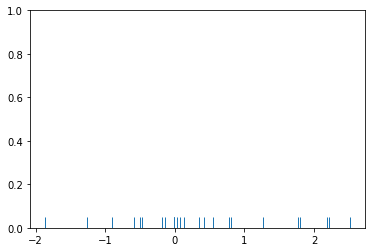

In [4]:
sns.rugplot(dataset)

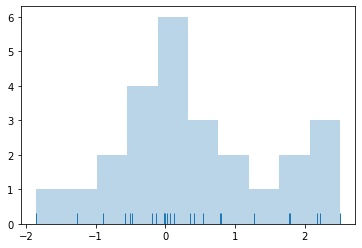

In [5]:
plt.hist(dataset, alpha=0.3)
sns.rugplot(dataset)

(0, 1)

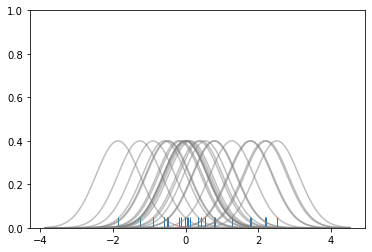

In [6]:
sns.rugplot(dataset);

# X軸を競ってい
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 全体を等間隔に100分割します。
x_axis = np.linspace(x_min,x_max,100)

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2

kernel_list = []

for data_point in dataset:
    
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)

    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

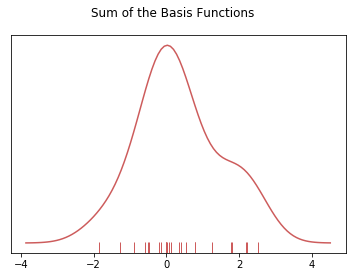

In [8]:
# 手動でKDEを作ります。
sum_of_kde = np.sum(kernel_list,axis=0)

fig = plt.plot(x_axis,sum_of_kde,color='indianred')

sns.rugplot(dataset,c = 'indianred')

plt.yticks([])

plt.suptitle("Sum of the Basis Functions")

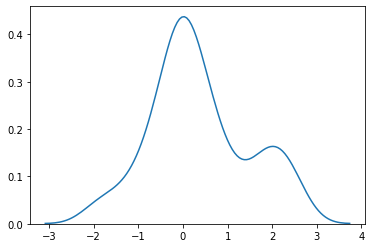

In [9]:
sns.kdeplot(dataset)

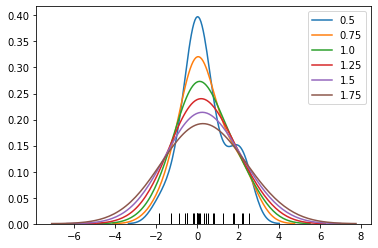

In [10]:
sns.rugplot(dataset,color='black')
# バンド幅を変えてみましょう。
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,label=bw)

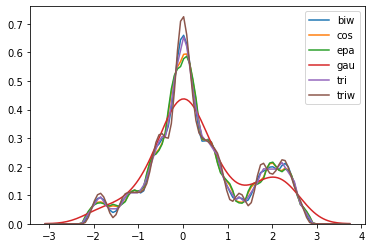

In [11]:
kernel_options = ["biw", "cos", "epa", "gau", "tri", "triw"]

for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern)

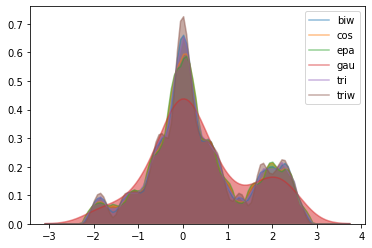

In [12]:
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True,alpha=0.5)

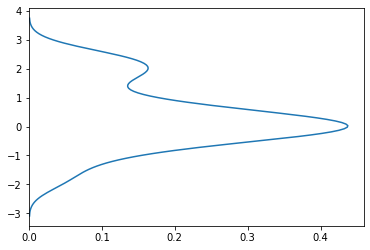

In [13]:
# 軸を入れ替えることもできます。
sns.kdeplot(dataset,vertical=True)

(array([ 1.,  2.,  4.,  8., 14., 17., 19., 20., 22., 25.]),
 array([-1.86001728, -1.42301233, -0.98600738, -0.54900243, -0.11199748,
         0.32500747,  0.76201242,  1.19901737,  1.63602232,  2.07302727,
         2.51003222]),
 <a list of 10 Patch objects>)

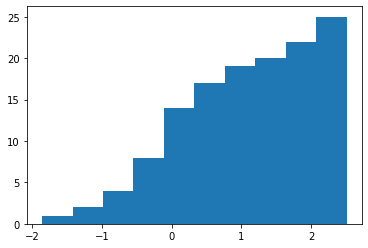

In [14]:
plt.hist(dataset, cumulative=True)

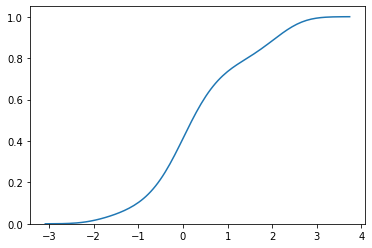

In [15]:
sns.kdeplot(dataset,cumulative=True)

/Users/ishizakikiyohiko/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:693: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


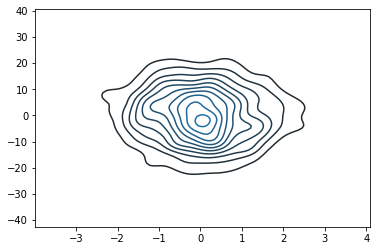

In [16]:
# 2次元平面上の中心
mean = [0,0]
# それぞれの分散を決めます。
cov = [[1,0],[0,100]]
# これに従う多変量正規分布
dataset2 = np.random.multivariate_normal(mean,cov,1000)
# DataFrameにしておきましょう。
dframe = pd.DataFrame(dataset2,columns=['X','Y'])
# プロットします。SeabornとPandasの相性は抜群
sns.kdeplot(dframe)

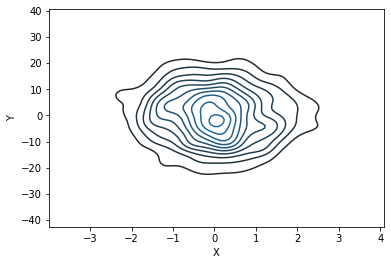

In [17]:
sns.kdeplot(dframe.X, dframe.Y)

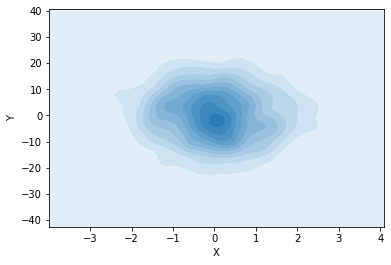

In [19]:
sns.kdeplot(dframe.X, dframe.Y, shade=True)

/Users/ishizakikiyohiko/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:693: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


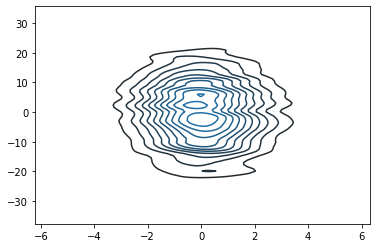

In [20]:
sns.kdeplot(dframe, bw=1)

/Users/ishizakikiyohiko/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:693: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


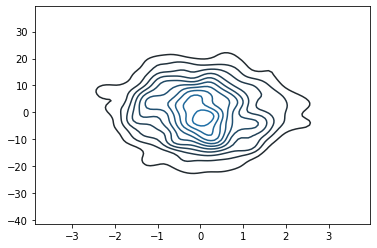

In [21]:
sns.kdeplot(dframe, bw='silverman')

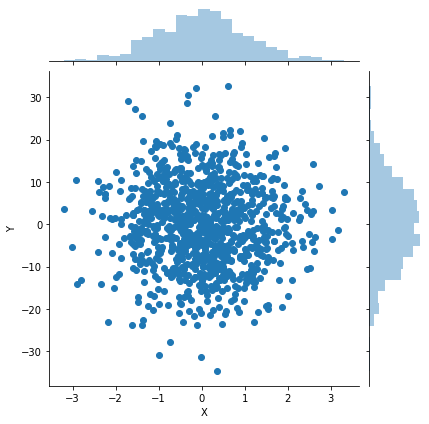

In [24]:
sns.jointplot('X','Y', dframe)

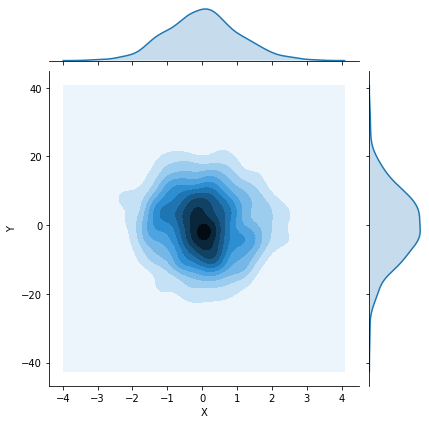

In [25]:
sns.jointplot('X','Y', dframe, kind='kde')